# Feedback for Project

## Kirschner's Solution

In [1]:
## For checking pep8
%load_ext pycodestyle_magic

In [ ]:
## Run this cell if you are using Colab
from google.colab import files
uploaded = files.upload()

In [3]:
#%%pycodestyle ## Uncomment to check PEP8 style
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import csv
import math
import statistics
import sys

from itertools import zip_longest


# Note, that the uniques function isn't really necessary.
def uniques(data_list=None):
    """
    Returns the unique values found in a list.

    input: a list
    return: a set
    """

    if not isinstance(data_list, list):
        sys.exit('A list was not used for determining unique data entries. '
                 'Exiting.')

    unique_values = set(data_list)

    return unique_values


def mean_sigfig(float_list=None, decimal_places=None):
    """
    Returns the mean value for a list of numbers. The resulting mean will be
    rounded ('round to even') to the specified number of decimal_places.

    input: a list of floats, integers, or a comboination of floats and integers
    return: a single float
    """

    if not isinstance(float_list, list):
        sys.exit('A list was not used for determining the mean. Exiting.')
    if not isinstance(decimal_places, int):
        sys.exit('An interger was not given for the numer of decimal places. '
                 'Exiting.')

    # A zero incorrectly give a result, for example, of 5.0 for an input of 5.2
    if decimal_places > 0:
        mean_value = statistics.mean(float_list)
    else:
        sys.exit('The number of decimal places (i.e. {0}) given is '
                 'problematic. Exiting.'.format(decimal_places))

    return round(mean_value, decimal_places)


def max_digits_list(float_list=None, max_digits=None, min_digits=None):
    """
    Create two seperate lists that contain numbers that correspond to the
    maximum and minimum number of digits. These correspond to the high/low
    magnitudes of the numbers (e.g. 10^0, 10^1, 10^2...etc).

    Note: The fact that floats contain a decimal point results in +1
    being included into the the length comparison.

    input: a list of floats
           maximum number of digits (type: int)
           minumum number of digits (type: int)
    return: two lists (max and min digits) containing floats
    """

    if not isinstance(float_list, list):
        sys.exit('A list was not used for determining the mean. Exiting.')
    if not isinstance(max_digits, int):
        sys.exit('An integer was not used for the maximum number of digits. '
                 'Exiting.')
    if not isinstance(min_digits, int):
        sys.exit('An integer was not used for the minimum number of digits. '
                 'Exiting.')

    max_list = []
    min_list = []

    for item in float_list:
        if len(str(item)) == max_digits + 1:
            max_list.append(item)
        if len(str(item)) == min_digits + 1:
            min_list.append(item)

    # max_list = [item for item in float_list if len(str(item)) == max_digits + 1]
    # min_list = [item for item in float_list if len(str(item)) == min_digits + 1]

    return max_list, min_list


def max_min_digits(float_list=None):
    """
    Determine the maximum (max) and minimum (min) number of digits
        in a list of float, and removes one due to the decimal point."

    input: a list of floats
    return:  maximum and minimum number digits (types: int)
     """

    if not isinstance(float_list, list):
        sys.exit('A list was not given for determining the max and min number '
                 'of digits. Exiting.')

    maximum = -math.inf
    mininum = math.inf

    for item in range(0, len(float_list)):
        if maximum < (len(str(float_list[item])) - 1):
            maximum = (len(str(float_list[item])) - 1)
        if mininum > (len(str(float_list[item])) - 1):
            mininum = (len(str(float_list[item])) - 1)

    return maximum, mininum


def import_data(input_file=None):
    """
    Import specific data from column numbers
    4 (i.e. countries) and
    6 (i.e. durations)

    input:   input csv file name with comma separator (type: str)
    return: seperate lists for countries (type: str) and
             durations(type: float)

    Note: this is given as a funtion in order to keep the __main__
        portion condensed and readable.
    """
    durations = []
    countries = []

    if not isinstance(input_file, str):
        sys.exit('A string was not used for the file name. Exiting.')

    try:
        with open(input_file) as file:
            read_it = csv.reader(file, delimiter=',')
            next(read_it)
            for row in read_it:
                countries.append(str(row[3]))
                durations.append(float(row[5]))
    except FileNotFoundError:
        print('The input file was not found.')

    return countries, durations


if __name__ == "__main__":

    """
    Homework Project 2: Ufo Sightings
    Task: Write a program (e.g. 'ufo_sighting.py') that does the following:

    - Using the csv library, read in the file ufo_data.csv
    - Calculate and print to screen the average duration of the sightings
    - Find all unique countries that have had ufo sightings, and print to
        screen a nonredundant list of them
    - Calculate the
        a) maximum and
        b) minimum number of digits of the numbers within the duration data
    - Create two new lists that contain the numbers that have the a) maximum
        and b) minimum number of digits (i.e. a max list and a minimum list)
    - Write a single new csv file that contains these two new lists, each
        given its own column
        (hint: take a look into the itertools.zip_longest function)

    input: ufo_data.csv
    output: print several analysis results to the screen
            save a csv file that contains the high/low magnitudes for the
            duration of UFO sightings

    Note: Most reusable tasks are created as functions, while those more
        specific to this homework are direclty below.
    """

    countries, durations = import_data('ufo_data.csv')

    unique_countries = uniques(countries)

    decimal_places = 1
    durations_mean = mean_sigfig(durations, decimal_places)

    maximum_digits, mininum_digits = max_min_digits(durations)
    max_list, min_list = max_digits_list(durations,
                                         maximum_digits,
                                         mininum_digits)

    with open('duration_max_min_magnitude.csv', 'w+') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['shortest duration (sec.)', 'longest duration (sec.)'])
        for values in zip_longest(min_list, max_list):
            writer.writerow(values)

    print('The maximum and minimum number of digits are '
          '{0} and {1}, respectively.'.format(maximum_digits, mininum_digits))

    print('The countries that have seen UFO are: {0}'.format(unique_countries))

    print('The mean time for {0} UFO sightings is {1}'.format(len(durations),
                                                              durations_mean))

2:1: E265 block comment should start with '# '
89:80: E501 line too long (82 > 79 characters)
90:80: E501 line too long (82 > 79 characters)
194:80: E501 line too long (80 > 79 characters)
205:1: W391 blank line at end of file


---


## Student's work

In [ ]:
from IPython.display import Markdown, display, display_html


def print_md(string):
    display(Markdown(string))


def restart_kernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>", raw=True)


restart_kernel()

In [ ]:
## For checking pep8
%load_ext pycodestyle_magic

### Feedback
- Good commenting
- Assert statements, but no isinstance statements
- Used user functions, increasing reusability and ease of correcting errors


- Did it alone
- Didn’t follow instructions (pandas instead of csv library to read in the data)
- Doesn’t save the duration data to a file
- Doesn't list the unique countries
- Does not print max (i.e. 9) and min (i.e. 2) number of digits to screen
- Uses Pandas, not CSV library
- Doesn’t follow PEP8 (double lines between user functions, 4 space indentations)
- Uses 1 letter variable names for counters (okay), but other names that are unclear (eg. dur, a, b)
- User functions do not define default values (e.g. Value=None)
- The output is tooo long, with 19362 data lines (should be 4015)
- Sigfigs given: > 10 (should be 5 due to addition rules while computing mean -- i.e. one decimal space is the limiting factor)
- python interpreter not given (#!/usr/bin/env python)

In [ ]:
#%%pycodestyle ## KNK
"""

Student 1: ???????????????

a. Conceptual development
b. Primary developer of all functions
c. Codeveloper of all error functions
   """




#from google.colab import files
#uploaded = files.upload()
import pandas as pd
import csv
import io
df2 = pd.read_csv('ufo_data.csv')
df2


def dfmean(Value=None):
  """This function calculates the mean of figures and prints it to screen
       Input:   Value    - a list filled with figures
              
       Return: nothing
  """
  assert len(Value) != 0, "The list is empty"
 

  dur = Value.mean()
  print('the mean is' , dur)
  return 

def whatisinhere(Value):
  """This function looks which elements are in a list
       Input:  Value - a list filled with figures or strings
              
       Return: init - a non redundant list of the elements in a list
  """

  assert len(Value) != 0, "The list is empty"
  rest = []
  init = []
  for i in Value:
    if i not in rest:
       init.append(i)
       rest.append(i)
  return init

def maxdigits(Value):
  """This function finds the figure with the maximum digits
       Input:   Value    - a list filled with figures
              
       Return: maxval - the length of the figure with maximum digits
  """
  assert len(Value) != 0, "The list is empty"
  maxval = floatlength(Value.max())
  
  return maxval

def mindigits(Value):
  """This function finds the figure with the minimum digits
       Input:   Value    - a list filled with figures
              
       Return: minval - the length of the figure with minimim digits
  """
  assert len(Value) != 0, "The list is empty"
  minval = floatlength(Value.min())
  
  return minval

def floatlength(Value):
  """This function calculates the length of a float figure
       Input:   Value    - a list filled with float figures
              
       Return: maxvals - en(stri)-1 - the length of a string minus the dot
  """
  
  stri = str(Value)
  return len(stri)-1

def listmaxval(Value):
  """This function finds all float figures with the same max length
       Input:   Value    - a list filled with float figures
              
       Return: maxvals - a list with figures of the same length
  """
  assert len(Value) != 0, "The list is empty"
  maxva = maxdigits(Value)
  dfvals = Value
  strvals = []
  maxvals = []
  i = 0
  while i < len(dfvals):
    strvals.append(str(dfvals[i]))
    i += 1
  j = 0
 
  while j < len(strvals):
    if floatlength(strvals[j]) == maxva:
      maxvals.append(dfvals[j])
    j+=1
  
  return maxvals

def listminval(Value):
  """This function finds all float figures with the same min length
       Input:   Value    - a list filled with float figures
              
       Return: minvals - a list with figures of the same length
  """
  assert len(Value) != 0, "The list is empty"
  minva = mindigits(Value)
  dfvals = Value
  strvals = []
  minvals = []
  i = 0
  while i < len(dfvals):
    strvals.append(str(dfvals[i]))
    i += 1
  j = 0
 
  while j < len(strvals):
    if floatlength(strvals[j]) == minva:
      minvals.append(dfvals[j])
    j+=1
  
  return minvals

  
dfmean(df2['duration (seconds)'])
whatisinhere(df2['country'])
b = listmaxval(df2['duration (seconds)'])
a = listminval(df2['duration (seconds)'])




data = pd.DataFrame({'minimum digits': pd.Series(a), 'maximum digits': pd.Series(b)})
data ## The DataFrame adds a zero to some of the minimum digits and i could not figure out how to solve it.



  

In [ ]:
## Showing the limiting decimal number
duration = []
country = []
with open('ufo_data.csv') as file:
   reader = csv.reader(file, delimiter=',')
   reader = csv.DictReader(file)
   for row in reader:
     duration.append(float(row['duration (seconds)']))
     #country.add(row['country'])
duration

---
<br><br><br><br><br>

In [ ]:
from IPython.display import Markdown, display, display_html


def print_md(string):
    display(Markdown(string))


def restart_kernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>", raw=True)


restart_kernel()

#### Feedback
- Reasonable commenting
- Readable
- CSV output is a correct with 4015 data lines
- Unique countries are correct: 'us', 'au', 'ca', 'gb'
- Correctly prints the max (i.e. 9) and min (i.e. 2) number of digits to screen
- Used user functions, increasing reusability and ease of correcting errors


- Saved CSV file contains strings, not floats
- A few PEP8 violations (tab spaces, double spaces after function)
- A few spelling mistakes (e.g. calculatet, funktion)
- Sigfigs are wrong; the correct answer is 5 (i.e. with 1 decimal place)
- Assert statements rather than isinstance statements
- Single letter variable names
- python interpreter not given (#!/usr/bin/env python)

In [ ]:
#%%pycodestyle
'''
Student ??????:

a. Conceptual development, 1, 2, 3, 4

Student ?????????

a. Conceptual development, 5, 6


'''
import csv
import statistics as st
from numpy import around
import itertools as it
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#%%pycodestyle
#declare variables that in ufo_data
datetime=[]
city=[]
state=[]
country=[]
shape=[]
duration=[]# (seconds)
comments=[]
date_posted=[]
latitude=[]
longitude=[]
year=[]

#Using the csv library, read in the file ufo_data.csv
with open('ufo_data.csv') as file:
   read_it=csv.reader(file, delimiter=',')
   next(read_it)  ## skips header (i.e. the first row)
   for row in read_it:
        datetime.append((row[0]))
        city.append((row[1]))
        state.append((row[2]))
        country.append((row[3]))
        shape.append((row[4]))
        duration.append(float((row[5])))   # (seconds)
        comments.append((row[6]))
        date_posted.append((row[7]))
        latitude.append((row[8]))
        longitude.append(float((row[9])))
        year.append(float((row[10])))


In [ ]:
print('The calculatet average duration of the sightings is {:0.2E} seconds'.format(around(st.mean(duration))))

In [ ]:
# noredundant list of countries
nonred_list=[]

for i in country:
    if i not in nonred_list:
        nonred_list.append(i)
        
print(nonred_list)


In [ ]:
#%%pycodestyle
#This funktion takes a list and return a list with Min and Max digits of the numbers in this list.
def get_min_max(x=None):
    count_digits=[]
    assert(type(x)==list),'The given object is not a list'  
    for i in x:
        count_digits.append((len(str(i)))-1)
        
    return [min(count_digits), max(count_digits)]

min_max=get_min_max(duration)
print('The minimum of digits are {0:} and the maximum of digits {1:}'.format(min_max[0], min_max[1]))

In [ ]:
#This function has to get a list and return a list with the numbers that have the maximum numbers of digits
def get_min(x=None):
    re_min=[]
    assert(type(x)==list),'The given object is not a list'
    
    min=get_min_max(x)[0]
    for i in x:
        if len((str)(i))-1==min:
            re_min.append(i)
    return re_min

#This function has to get a list and return a list with the numbers that have the minimum numbers of digits
def get_max(x=None):
    re_max=[]
    assert(type(x)==list),'The given object is not a list'
    max = get_min_max(x)[1]
    for i in x:
        if len((str)(i))-1==max:
            re_max.append(i)
    return re_max

y = get_min(duration)
z = get_max(duration)

In [ ]:
#This function creates a new CSV file with the name "NewList" and writes in the min and max values as seperate columns
with open('NewList.csv', 'w', newline='') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    #it.zip_longest combines our two list as tuples and files the missing values (e.g. with uneven long lists) with filler (default = none)
    #this is needed because we want the two list filled in the columns and not into two rows, wich is not supported by the default csv function
    row = it.zip_longest(y,z)
    print (row)
    #writing row for row 
    for i in row:
        wr.writerow(i)

---
<br><br><br><br><br>

In [ ]:
from IPython.display import Markdown, display, display_html


def print_md(string):
    display(Markdown(string))


def restart_kernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>", raw=True)


restart_kernel()

In [ ]:
## For checking pep8
%load_ext pycodestyle_magic

### Feedback
- Readable
- Saved CSV file contains floats
- CSV output is a correct with 4015 data lines
- Unique countries are correct: 'us', 'au', 'ca', 'gb'
- Defines variables well


- Comments okay, but could be better (e.g. purpose; input and output statements)
- A few PEP8 violations (indent spaces)
- Doesn’t use “with” statement to save csv file
- python interpreter not given (#!/usr/bin/env python)


- no internal controls (e.g. isinstance, assert statements)
- 4 for loops that have the same condition
- No user functions (e.g. to compute max and min) - reduces reusability, and ease of correcting errors
- Sigfigs are wrong; the correct answer is 5 (i.e. with 1 decimal place)
- Does not print max (i.e. 9) and min (i.e. 2) number of digits to screen

# Homework Project 2: Ufo Sightings
## Task:
Homework Project Number 2

Graded using a mark (1.0--5.0)

Task: Write a program (e.g. 'ufo_sighting.py') that does the following:

- Using the csv library, read in the file ufo_data.csv

- Calculate and print to screen the average duration of the sightings

- Find all unique countries that have had ufo sightings, and print to screen a nonredundant list of them

- Calculate the 
--  a) maximum and
--  b) minimum number of digits of the numbers within the duration data

- Create two new lists that contain the numbers that have the a) maximum and b) minimum number of digits (i.e. a max list and a minimum list)
- Write a single new csv file that contains these two new lists, each given its own column
-- (hint: take a look into the itertools.zip_longest function)
- Include at the top of the code as a block comment (i.e. triple quotations) a clear statement of each your contribution



In [ ]:
#uploading ufo_data.csv file to colab
from google.colab import files
uploaded = files.upload()




In [ ]:
#%%pycodestyle
#!/usr/bin/env python
## Ufo Sightings v1.0
## Author: ???????????????

import csv
import statistics
from itertools import zip_longest

duration = []
country = set()
max_duration = []
min_duration = []
max_digit = 0

with open('ufo_data.csv') as file:
   reader = csv.reader(file, delimiter=',')
   reader = csv.DictReader(file)
   for row in reader:
     duration.append(float(row['duration (seconds)']))
     country.add(row['country'])

## avg duration of sightings
mean_duration_sec = statistics.mean(duration)
mean_duration_min = mean_duration_sec / 60
mean_duration_hours = mean_duration_min / 60
print("""The average duration of sightings is approx. \n
    {0} seconds or
    {1} minutes or
    {2} hours"""
    .format(mean_duration_sec, mean_duration_min,mean_duration_hours))

print()
## unique country list
print("UFOs were sighted in the following countries:")
print(str(country))

## calculating min & max digits of numbers
for digits in duration:
  digits = len(str(digits))
  if digits >= max_digit:
    max_digit = digits

min_digit = max_digit

for digits in duration:
  digits = len(str(digits))
  if digits <= min_digit:
    min_digit = digits

for digits in duration:
  if len(str(digits)) == max_digit:
    max_duration.append(digits)

for digits in duration:
  if len(str(digits)) == min_digit:
    min_duration.append(digits)


## Output duration lists in csv file
csv_output = open(r'min_max_list.csv', 'w')
csv_output.write('max list, min list\n')
for max_no, min_no in zip_longest(max_duration, min_duration):
    csv_output.write('%s,%s\n' % (max_no, min_no)) 

csv_output.close()

---
<br><br><br><br><br>

In [ ]:
from IPython.display import Markdown, display, display_html


def print_md(string):
    display(Markdown(string))


def restart_kernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>", raw=True)


restart_kernel()

#### Feedback
- Sigfigs: correct number (i.e. 5)
- Saved CSV file contains floats
- Unique countries are correct: 'us', 'au', 'ca', 'gb' (once the code was corrected)
- Correctly prints the max (i.e. 9) and min (i.e. 2) number of digits to screen (once the code was corrected)
- Used user functions, increasing reusability and ease of correcting errors
- Good commenting


- A few PEP8 violations
- Code doesn’t run: NameError: name 'list_of_durations' is not defined
- CSV output does not contain the correct number of 4015 data lines (once the code was corrected)
- No internal controls (e.g. isinstance, assert statements)
- python interpreter not given (#!/usr/bin/env python)

In [ ]:
'''
@author: ???, ???

Student1: ???
a) Conceptual development
b) Primary developer of: csv_reading, digitlists, min_digits
c) Codedeveloper of error functions and prints
d) Commenting and optimization

Student2: ???
a) Conceptual development
b) Primary developer of: csv_creation, csv_reading, max_digits 
c) Codedeveloper of imports
d) Commenting and optimization
'''

In [ ]:
##Imports:

import csv
import itertools as it
from statistics import mean

import numpy as np

#from google.colab import files ##Optional if using Google Colab 
#files.upload()

In [ ]:
##Task 1:

def csv_reading():
    list_of_durations=[]
    list_of_countries=[]

    ##Reading in the csv file using the csv library:

    with open('ufo_data.csv') as file:
    
        ufo_dataset = csv.reader(file, delimiter=',')

        next(ufo_dataset)
    
        for each_row in ufo_dataset:
            list_of_durations.append(float((each_row[5])))
            list_of_countries.append(each_row[3])


In [ ]:
##Task 4a): Maximun number of digits

''' This function calculates the maximum number of digits of the numbers within
    a given list
    Input:  duration_list   -- A list with data to work with 
    Return: max_counter     -- Amount of digits from the maximum number 
                               ("." not included)
'''
def max_digits(duration_list = None):
    
    if duration_list is not None:
        
        max_counter = 0
    
        for elements in range(len(duration_list)):
            temp_index = len(str(duration_list[elements]))
            if (max_counter <= (temp_index - 1)):
                max_counter = (temp_index - 1)
  
        return(max_counter)


##Task 4b): Minimum number of digits

''' This function calculates the minimum number of digits of the numbers within
    a given list
    Input:  duration_list   -- A list with the duration data to work with 
    Return: min_counter     -- Amount of digits from the minimum number 
                               ("." not included)
'''
def min_digits(duration_list = None):
    
    if duration_list is not None:
        
        min_counter = duration_list[0]

        for elements in range(len(duration_list)):
            index = len(str(duration_list[elements]))
            if (min_counter >= (index - 1)):
                min_counter = (index - 1)
  
        return(min_counter)


##Task 5: Creating two new max and min lists

''' Digitlists is a function that returns each unique duration time, which 
    matches either the max or min amount of digits in the duration_list
    Input:  duration_list   -- A list with the duration data to work with
    Return: max_list        -- A list with every maxmimum digit number
            min_list        -- A list with every minimum digit number
'''
def digitlists(duration_list = None):
    
    if duration_list is not None:
        max_list=[]
        min_list=[]
    
        max_digit = max_digits(list_of_durations)
        min_digit = min_digits(list_of_durations)
    
        for i in range(len(duration_list)):
            if (len(str(duration_list[i])) - 1) == min_digit:
                min_list.append(duration_list[i])
            
            if (len(str(duration_list[i])) - 1) == max_digit:
                max_list.append(duration_list[i])
            
        return set(max_list), set(min_list)    

In [ ]:
##Task 6: Writing a new csv file
''' csv_creation() takes the min/max lists returned from digitlists
    and creates a new csv file with them
'''

def csv_creation():
    tupel_list = list(it.zip_longest(
                        digitlists(list_of_durations)[1],
                        digitlists(list_of_durations)[0]))
    with open('number_lists.csv', 'w') as csvfile:
        rowwriter = csv.writer(csvfile, delimiter=',',
                               quotechar='|', 
                               quoting=csv.QUOTE_MINIMAL)

        rowwriter.writerow(["min","max"])

        for each_row in range(len(tupel_list)):
            rowwriter.writerow(tupel_list[each_row])

In [ ]:
#%%pycodestyle
''' Calling the functions and printing the solutions
    to the given tasks
'''
##Task1:

csv_reading()

##Task2: Calculating the average duration of ufo sightings

print("The average duration of ufo sightings is: {}".format(np.around(mean(list_of_durations),decimals=1)))

##Task3: Creating a non redundant list of countries in ufo_data

print("\nUfo's have been seen in: {}".format(set(list_of_countries)))

##Task4: Max and min amount of digits

print("\nThe maximum amount of digits a duration time in our data has is: {}".
        format(max_digits(list_of_durations)))
print("\nThe minimum amount of digits a duration time in our data has is: {}".
        format(min_digits(list_of_durations)))

##Task5: List of max/min numbers

print('''\nEvery unique duration time with the max amount of digits: {0}
\nEvery unique duration time with the min amount of digits: {1}'''.
         format(digitlists(list_of_durations)[0],
                digitlists(list_of_durations)[1]))

##Task6: Creating the csv file

csv_creation()

---
<br><br><br><br><br>

In [ ]:
from IPython.display import Markdown, display, display_html


def print_md(string):
    display(Markdown(string))


def restart_kernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>", raw=True)


restart_kernel()

In [ ]:
## For checking pep8
%load_ext pycodestyle_magic

#### Feedback
- PEP8 good, excluding the long lines (but allows for readability)
- Saved CSV file contains floats
- CSV output is a correct with 4015 data lines
- python interpreter is given (#!/usr/bin/env python)
- Includes a 'if \__name__ == "__main__":'
- Unique countries are correct: 'us', 'au', 'ca', 'gb'
- Used user functions, increasing reusability and ease of correcting errors
- Good commenting
- Readable


- Asks user for inputs (but no way to quit, doesn't specify to include file extensions in name -- output could be filename, filename.csv, or filename.csv.csv)
- Import statements could be ordered better


- Does not print max (i.e. 9) and min (i.e. 2) number of digits to screen
- Sigfigs are wrong; the correct answer is 5 (i.e. with 1 decimal place)
- Not initially executable - saved a python file (.py) as a jupyter notebook file (ipynb)
- Several user functions can only be used with the given csv file (see non_redundant_list), which could have been written more general
- Having a def main() is an adding an additional layer of coding that isn't 100% necessary, but okay
- Uncertain: Creates a class for styles – not sure why a class ... could this have been done differently?

In [ ]:
#%%pycodestyle ## KNK
#!/usr/bin/env python

"""
???????????????
a. Conceptual development
b. Primary developer of import_csv_file, write_list_as_csv, min_max_list, print_md, main


???????????????
a. Conceptual development
b. Primary developer of calculate_avg_duration, non_redundant_list, get_digits, get_duration, get_numbers_by_length
"""

import csv
import itertools
import pathlib
from enum import Enum

import numpy as np


# stores font styles
class Style(Enum):
    RED = '\033[91m'
    BLUE = '\033[94m'
    BOLD = '\033[1m'
    END = '\033[0;0m'
    DEFAULT = ''


# imports the csv file and returns the data as a list. needs a file name as str.
def import_csv_file(file_name: str) -> list:
    with open(file=file_name, newline='') as csv_file:
        data_file = csv.reader(csv_file)
        data_list = [row for row in data_file]
        return data_list


# calculates the average sighting duration. returns an float.
def calculate_avg_duration(data: list) -> float:
    return round(np.average(get_duration(data)), 2)


# returns countries as set to filter out duplicates.
def non_redundant_list(data: list) -> set:
    countries_list = [row[3] for row in data[1:]]
    countries_unique = set(countries_list)
    return countries_unique


# this will return either the minimum or maximum amount of digits of the duration data as int.
def get_digits(data: list, get_max=True) -> int:
    digits = [len(str(time)) if '.' not in str(time) else len(str(time)) - 1 for time in get_duration(data)]
    return max(digits) if get_max else min(digits)


# returns only the duration data as list.
def get_duration(data: list) -> list:
    duration_list = [float(row[5]) for row in data[1:]]
    return duration_list


# returns the numbers by length as list.
def get_numbers_by_length(data: list, length: int) -> list:
    return [row[5] for row in data[1:] if len(str(row[5]).replace('.', '')) == length]


# returns the minumum/maximum as a list.
def min_max_list(data: list) -> list:
    return [get_numbers_by_length(data=data, length=get_digits(data=data, get_max=False)),
            get_numbers_by_length(data=data, length=get_digits(data=data, get_max=True))]


# writes data into a csv. requires a file name as str.
def write_list_as_csv(list_data: list, file_name: str) -> str:
    with open(file_name, 'w', newline='') as csv_file:
        file_writer = csv.writer(csv_file, delimiter=',',
                                 quotechar='|', quoting=csv.QUOTE_MINIMAL)
        zip_list = list(itertools.zip_longest(list_data[0], list_data[1]))
        for element in zip_list:
            file_writer.writerow(element)
    return str(pathlib.Path(file_name).absolute())


# prints the given string in a certain style
def print_md(string: str, bold: bool, color: Style = Style.DEFAULT):
    if bold:
        print(color.value + Style.BOLD.value + string + color.END.value)
    else:
        print(color.value + string + color.END.value)


# main function. requires user input.
def main():
    while True:
        try:
            print_md(string='Please enter file name or relative path:', bold=False, color=Style.BLUE)
            data = import_csv_file(file_name=(input()))

        except FileNotFoundError:
            print_md(string='File was not found!', color=Style.RED, bold=True)
        else:
            print_md(string='Average duration: ' + str(calculate_avg_duration(data=data)), bold=True)

            print_md(string='Average duration: ' + 'Non redundant country list: ' + str(non_redundant_list(data=data)),
                     bold=True)

            print_md(string='Please enter output file name:', bold=False, color=Style.BLUE)
            path = write_list_as_csv(list_data=min_max_list(data=data), file_name=(input() + '.csv'))
            print_md(string='Average duration: ' + 'The file was saved at ' + path, bold=True)
            break


# call the main function
if __name__ == "__main__":
    main()

In [ ]:
## A way to control how you .py script/code will run
##     - directly from python filename.py
##     - or when imported as a module
## Occurs at the end of a file
## Python has reserved __name__ to be a unique attribute
## Usually you put the main calls of your code here

if __name__ == "__main__": 
    print('Executed when called directly - python filename.py')
else: 
    print('Executed when imported as a module')

Rewrite the bottom part of the code

In [ ]:
#%%pycodestyle ## KNK
#!/usr/bin/env python

"""
???????????????
a. Conceptual development
b. Primary developer of import_csv_file, write_list_as_csv, min_max_list, print_md, main


???????????????
a. Conceptual development
b. Primary developer of calculate_avg_duration, non_redundant_list, get_digits, get_duration, get_numbers_by_length
"""

import csv
import itertools
import pathlib
from enum import Enum

import numpy as np


# stores font styles
class Style(Enum):
    RED = '\033[91m'
    BLUE = '\033[94m'
    BOLD = '\033[1m'
    END = '\033[0;0m'
    DEFAULT = ''


# imports the csv file and returns the data as a list. needs a file name as str.
def import_csv_file(file_name: str) -> list:
    with open(file=file_name, newline='') as csv_file:
        data_file = csv.reader(csv_file)
        data_list = [row for row in data_file]
        return data_list


# calculates the average sighting duration. returns an float.
def calculate_avg_duration(data: list) -> float:
    return round(np.average(get_duration(data)), 2)


# returns countries as set to filter out duplicates.
def non_redundant_list(data: list) -> set:
    countries_list = [row[3] for row in data[1:]]
    countries_unique = set(countries_list)
    return countries_unique


# this will return either the minimum or maximum amount of digits of the duration data as int.
def get_digits(data: list, get_max=True) -> int:
    digits = [len(str(time)) if '.' not in str(time) else len(str(time)) - 1 for time in get_duration(data)]
    return max(digits) if get_max else min(digits)


# returns only the duration data as list.
def get_duration(data: list) -> list:
    duration_list = [float(row[5]) for row in data[1:]]
    return duration_list


# returns the numbers by length as list.
def get_numbers_by_length(data: list, length: int) -> list:
    return [row[5] for row in data[1:] if len(str(row[5]).replace('.', '')) == length]


# returns the minumum/maximum as a list.
def min_max_list(data: list) -> list:
    return [get_numbers_by_length(data=data, length=get_digits(data=data, get_max=False)),
            get_numbers_by_length(data=data, length=get_digits(data=data, get_max=True))]


# writes data into a csv. requires a file name as str.
def write_list_as_csv(list_data: list, file_name: str) -> str:
    with open(file_name, 'w', newline='') as csv_file:
        file_writer = csv.writer(csv_file, delimiter=',',
                                 quotechar='|', quoting=csv.QUOTE_MINIMAL)
        zip_list = list(itertools.zip_longest(list_data[0], list_data[1]))
        for element in zip_list:
            file_writer.writerow(element)
    return str(pathlib.Path(file_name).absolute())


# prints the given string in a certain style
def print_md(string: str, bold: bool, color: Style = Style.DEFAULT):
    if bold:
        print(color.value + Style.BOLD.value + string + color.END.value)
    else:
        print(color.value + string + color.END.value)

# call the main function
if __name__ == "__main__":
    while True:
        try:
            print_md(string='Please enter file name or relative path:', bold=False, color=Style.BLUE)
            data = import_csv_file(file_name=(input()))

        except FileNotFoundError:
            print_md(string='File was not found!', color=Style.RED, bold=True)
        else:
            print_md(string='Average duration: ' + str(calculate_avg_duration(data=data)), bold=True)

            print_md(string='Average duration: ' + 'Non redundant country list: ' + str(non_redundant_list(data=data)),
                     bold=True)

            print_md(string='Please enter output file name:', bold=False, color=Style.BLUE)
            path = write_list_as_csv(list_data=min_max_list(data=data), file_name=(input() + '.csv'))
            print_md(string='Average duration: ' + 'The file was saved at ' + path, bold=True)
            break


---
<br><br><br><br><br>

In [ ]:
from IPython.display import Markdown, display, display_html


def print_md(string):
    display(Markdown(string))


def restart_kernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>", raw=True)


restart_kernel()

In [ ]:
## For checking pep8
%load_ext pycodestyle_magic

#### Feedback
- Plots a percentage of sightings (fun thing to do)
- Good commenting
- Unique countries are correct: 'us', 'au', 'ca', 'gb'
- Correctly prints the max (i.e. 9) and min (i.e. 2) number of digits to screen
- CSV output is a correct with 4015 data lines (no header though)


- hard codes path to python interpreter --- should be #!/usr/bin/env python


- Doesn't run as is – had to make a minor modification to read in the csv file
- Sigfigs are wrong; the correct answer is 5 (i.e. with 1 decimal place)
- Some PEP8 violations (e.g. lines after user functions, extra spaces)
- Writes a hidden file (i.e. .filename)
- CSV file – string of tuple – adds data in the second column (i.e. 0)
        "(8.0, 10526400.0)"
        "(3.0, 82800000.0)"
        "(3.0, 52623200.0)"
        ...
        "(3.0, '0')"
        "(6.0, '0')"
- 'UniqueCountries function require pre-knowledge of what is listed - could be done much more generally




Average duration of sightings (sec): 6573.01
Average duration of sightings (min): 109.55


Minimum numbers of digits: 2
Maximum numbers of digits: 9


Following countries had ufo sightings in numbers: 
['us', 'ca', 'au', 'gb']
[63552, 2941, 9, 10]


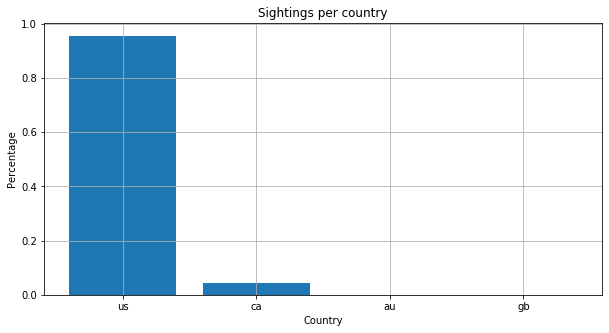

In [1]:

#%%pycodestyle ## KNK
#!\AppData\Local\Programs\Python\Python37\
# -*- coding: utf-8 -*-

"""
Created on 05/08/2020

@author: ???????????????????

???????????????????:
    a.  Conceptual development
    b.  Primary developer of
                    -   Main()
                    -   ReadFile()
                    -   UniqueCountries()
                    -   NumberOfDigits()
                    -   CollectMaximumNumbers()
                    -   CollectMinimumNumbers()
    c.  Primary developer of user interface

???????????????????:
    a. Conceptual development
    b. Primary developer of
                    -   WriteCSVFile()
                    -   ShowPlot
    c. Developer of error functions


"""
"""
    ufo_sighting.py is a program that evaluates ufo sighting data and
    gives the following:
        -   Average duration of ufo sightings
        -   Countries, which had ufo sightings
        -   Maximum/Minimum number of digits within the duration data 
            (longest/shortest numbers)
        -   All data of duration, which match the
            maximum/minimum number of digits
            and saves those data into a new CSV file

"""

##  imports     ##
import csv
import numpy as np
import matplotlib.pyplot as plt
## https://docs.python.org/3/library/itertools.html ##
from itertools import zip_longest

##  variables   ##
datetime = []
countries_overall = []
countries_unique = []
country_counter = [0,0,0,0]
duration = []
average_duration = 0

##  return lists ##
min_list = []
max_list = []

##
def Main():
    """
        This function is used as an executable interface
        for console output
    """
    ReadFile()

    print("\n\n")
    average_duration = np.mean(duration)
    print("Average duration of sightings (sec): {0:6.6}"
            .format(average_duration))
    print("Average duration of sightings (min): {0:5.5}"
            .format(average_duration/60))
    print("\n")
    number_of_digits = NumberOfDigits()
    print("Minimum numbers of digits: {0}\nMaximum numbers of digits: {1}"
            .format(number_of_digits[0], number_of_digits[1]))

    min_list = CollectMininumNumbers(number_of_digits)
    max_list = CollectMaximumNumbers(number_of_digits)
    print("\n")
    countries_unique = UniqueCountries()
    print("Following countries had ufo sightings in numbers: \n{0}\n{1}"
            .format(countries_unique, country_counter))

    ShowPlot()
    WriteCSV(min_list, max_list)

##
def ReadFile():
    """ 
        This function opens the ufo data and saves it into arrays
        - to read a different file, just change the path below
    """
    #with open(r'.\ufo_data.csv') as file:
    with open(r'ufo_data.csv') as file: ## KNK
        read_line = csv.reader(file, delimiter = ',')
        next(read_line)

        for row in read_line:   
            datetime.append(row[0])
            countries_overall.append(row[3])
            duration.append(float(row[5]))
        
##
def UniqueCountries():
    """
        This function lists all nonredundant countries in the data
    """
    temp_list = []
    for country in countries_overall:
        if(country not in temp_list): temp_list.append(country)
        elif(country == 'us'): country_counter[0] += 1
        elif(country == "ca"): country_counter[1] += 1
        elif(country == "au"): country_counter[2] += 1
        elif(country == "gb"): country_counter[3] += 1
    return temp_list

##
def NumberOfDigits():
    """
        This function calculates the maximun & minimum number of digits
        within the duration data

        Return: list of two values: list[0] -> Minimum
                                    list[1] -> Maximum

    """
    temp_number = 0;
    ##set limits to calculate an approximate value
    min_number_of_digits = 10   
    max_number_of_digits = 0
    for x in duration:
        ##casting the current number into string to get its length
        temp_number = len(str(x))   
        if(temp_number > max_number_of_digits):
            max_number_of_digits = temp_number
        elif (temp_number < min_number_of_digits):
            min_number_of_digits = temp_number    

    ##subtracting one digit, because of decimal point within string        
    return [min_number_of_digits-1, max_number_of_digits-1]
        
##
def CollectMaximumNumbers(numbers_len):
    """
        This function collects all data with the given length
        Input: numbers_len  - length of maximum values
        
        Return: temp_max_list - list with all maximum values

    """
    temp_max_list = []
    for x in duration:
        ##subtracting one digit, because of decimal point
        current_num_len = len(str(x))-1                      
        if(current_num_len == numbers_len[1]): temp_max_list.append(x) 
    return temp_max_list

##
def CollectMininumNumbers(numbers_len):
    """
        This function collects all data with the given length
        Input: numbers_len  - length of minimum values
        
        Return: temp_min_list - list with all minimum values

    """   
    temp_min_list = []
    for x in duration:
         ##subtracting one digit, because of decimal point
        current_num_len = len(str(x))-1                     
        if(current_num_len == numbers_len[0]): temp_min_list.append(x)
    return temp_min_list

##
def WriteCSV(list1, list2):
    ## merges 2 lists on its objects
    combinated = list(zip_longest(list1, list2, fillvalue="0"))
    with open(".\evaluated_data.csv", 'w') as csvfile:     
        csvwriter = csv.writer(csvfile)
        for x in combinated:
            csvwriter.writerow([x])

def ShowPlot():
    """
        This function is used to display some additional info
        about the location of sightings

    """   
    un = UniqueCountries()
    counter = country_counter / np.sum(country_counter)

    plt.figure(figsize = (10, 5))
    plt.bar(un, counter)
    plt.grid()
    plt.xlabel("Country")
    plt.ylabel("Percentage")
    plt.title("Sightings per country")
    plt.show()

## Execute Interface ##
Main()




---
<br><br><br><br><br>

In [ ]:
from IPython.display import Markdown, display, display_html


def print_md(string):
    display(Markdown(string))


def restart_kernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>", raw=True)


restart_kernel()

In [ ]:
## For checking pep8
%load_ext pycodestyle_magic

### Feedback
- Defines variables well
- Good commenting
- Readable
- Saved CSV file contains floats
- CSV output is a correct with 4015 lines long
- Unique countries are correct: 'us', 'au', 'ca', 'gb'


- Does not print max (i.e. 9) and min (i.e. 2) number of digits to screen
- A few PEP8 violations (spaces, blank lines)
- Opens the csv file multiple times - increases chances of introducing an error
- Assigns shortest digits initially to 10 (what if it is longer?)
- Sigfigs: 4; the correct answer is 5 (i.e. 1 decimal place)
- No user functions (e.g. to compute max and min) - reduces reusability, and ease of correcting errors
- python interpreter not given (#!/usr/bin/env python)

In [1]:
#%%pycodestyle ## KNK

"""
Homework Project Number 2:

Use the csv  library  as well as the statistics library in python to 
calculate the average duration,  maximum/minimum number of digits of 
the numbers within the duration data, Find all unique countries that
have had ufo sightings, and create a new file based on the data 
already calculated in the first part of the code.
"""

import csv 
import statistics
from itertools import zip_longest

"""
????????????????????????:
a. Primary developer of  the part of the code used to calculate the
   average, maximum, minimum and distinct countries that have had ufo
   sightings.
b. Codeveloper of the part of the code used to create a new CSV file
   based on the two new lists.
             
????????????????????????:
 a. Developer of the part of the code used to create a new CSV file 
    based on the two new lists.
 b. Commenting the code and try to make it clear.
 
"""

# Declare necessary variables
duration = []
countries = []
longestDigits = 0
shortestDigits = 10 
maximum = []
minimum = []

# Open the "ufo_data.csv" file.
with open('ufo_data.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    
    
    # Skip the first line of the file
    next(csv_reader)
    
    for row in csv_reader:
        # Save the desired values into a list
        duration.append(float(row[5]))
        
        # Record only the distinct values of the countries
        if row[3] not in countries:
            countries.append(row[3])
         
        #maximum/minimum number of digits of the numbers within the duration data
        if len(str(row[5])) > longestDigits:
            longestDigits= len(str(row[5]))
        if len(str(row[5])) < shortestDigits:
            shortestDigits= len(str(row[5]))
            
with open('ufo_data.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    
            
    for row in csv_reader:
        # Save all the values that have the same length as the maximum/minimum
        if len(str(row[5])) == longestDigits:
            maximum.append(float(row[5]))
        
        if len(str(row[5])) == shortestDigits:
            minimum.append(float(row[5])) 
 
 #Create a new csv file and add the sort values to the file
rows = [minimum,maximum]   
export_data = zip_longest(*rows, fillvalue='')
with open('min_max.csv', 'w', encoding='ISO-8859-1', newline='') as myfile:
    wr = csv.writer(myfile)
    wr.writerow(("Min.", "Max."))
    wr.writerows(export_data)
    
print('The average duration of sightings is {0} seconds'.format(round(statistics.mean(duration))))
print('Countries with ufo sightings: ',countries)

The average duration of sightings is 6573 seconds
Countries with ufo sightings:  ['us', 'ca', 'au', 'gb']


---
<br><br><br><br><br>

In [ ]:
from IPython.display import Markdown, display, display_html


def print_md(string):
    display(Markdown(string))


def restart_kernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>", raw=True)


restart_kernel()

In [ ]:
## For checking pep8
%load_ext pycodestyle_magic

### Feedback
- Good commenting
- Defines variables well
- Generalizable
- Readable
- Sigfigs: correct number (i.e. 5)
- PEP8 is good, apart from long liness
- Saved CSV file contains floats
- CSV output is a correct with 4015 data lines
- Unique countries are correct: 'us', 'au', 'ca', 'gb'
- Has internal checks


- Does not print max (i.e. 9) and min (i.e. 2) number of digits to screen
- Import statements could be ordered better
- python interpreter not given (#!/usr/bin/env python

In [1]:
#%%pycodestyle ## KNK
"""
Authors:  ?????????????
Development: 
1. Kickoff metting (Contributor ?????????????, ?????????????)
    - evaluation which task needs to be done
    -> result in development for 2 main function
            - read_csv
            - write_csv
2. Evaluation for function functionality (Contributor ?????????????, ?????????????)
    - read_csv : see function description
    - write_csv : see function description
3. Developing main function 
    - read_csv : Contributor : ?????????????
    - write_csv : Contributor : ?????????????

4. Solving given tasks 1 - 6 (Contributor: ?????????????, ?????????????)
    Pair Programming via Remote 
     - Primary Developer : ?????????????
     - Secondary Devloper : ????????????? 

5. Refactoring 
    - Added comments : ?????????????
    - Code formatting : ????????????? 
    - Output formatting : ????????????? 
"""

# for type annotations
from typing import List, Dict, Callable, Any
# to check if the given file exists in read_csv
import os
# to 'gracefully' exit with an error message
import sys

import csv
import statistics
import itertools


def read_csv(
        filepath: str,
        rename: Dict[str, str],
        conversion: Dict[str, Callable[[str], Any]]) -> Dict[str, List[Any]]:
    """Read and parse a CSV file.

    Parameters
    ----------  
    filepath : str
        The path to the csv file  
    rename : Dict[str, str], optional
        A dictionary that maps column names from the CSV file to new column names.
    conversion : Dict[str, Callable[[str], any]], optional
        A dictionary that maps column names to conversion functions.
        If columns were renamed using the `rename` argument, use the new column name here instead.
        The conversion function should take one argument (the raw string value) and return the converted value.
        If a column does not appear in this list, the row values are appended as string.

    Returns
    -------
    A dictionary that maps column names to row values for each column.

    Example
    -------
        Given ('data.csv'):
            year,name
            2020,Paul
            2019,Keith

        Function call:  
            read_csv('data.csv', rename={'name': 'first_name'}, conversion={'year': int})

        Returns:
            {'year': [2020, 2019], 'first_name': ['Paul', 'Keith']}
    """
    if not os.path.exists(filepath) or not os.path.isfile(filepath):
        sys.exit(f"File `{filepath}` does not exist.")

    result: Dict[str, List[any]] = dict()

    with open(filepath) as infile:
        reader = csv.reader(infile, delimiter=',')

        # read in column names from header (i.e. first line of the CSV)
        header = next(reader, None)

        if header is None:
            sys.exit(f"File `{filepath}` is empty.")

        # perform rename if necessary and initialize column entries with empty lists
        for column_name in header:
            if column_name in rename:
                header[header.index(column_name)] = rename[column_name]
                result[rename[column_name]] = []
            else:
                result[column_name] = []

        # read values from each row, converting if necessary
        for row in reader:
            for col_index in range(len(row)):
                column_name = header[col_index]
                value = row[col_index]
                if column_name in conversion:
                    value = conversion[column_name](value)
                result[column_name].append(value)

    return result


def write_csv(filepath: str, rows: Dict[str, List[any]], delimiter: str = ',') -> None:
    """Write the given rows to a file. The file is created if it does not exist, otherwise it is overwritten.

    Parameters
    ----------
    filepath: str
        The path to the file that should be written to.
    rows: Dict[str, List[any]]
        A dictionary mapping column names to row value lists.
    delimiter: str
        The string to use as a delimiter in the CSV file.
        Default: ','
    """
    # Open the file in w+ mode, meaning the file should be created or overwritten.
    # Setting newline='' is recommended in the documentation for the csv library
    # to avoid incorrect newline handling. Source: https://docs.python.org/3/library/csv.html#id3
    with open(filepath, 'w+', newline='') as outfile:
        writer = csv.writer(outfile, delimiter=delimiter)

        # the column names are the dictionary keys in the given `rows` dictionary
        header = list(rows.keys())
        writer.writerow(header)

        # combine the row values into tuples of the form (column1_value, column2_value, ...)
        rows = itertools.zip_longest(*list(rows.values()), fillvalue='')

        for entry in rows:
            writer.writerow(entry)


def get_unique_elements(values: List[any]) -> List[any]:
    """Create a new list that contains all unique elements in the given list.

    Parameters
    ----------
    values: List[any]
        The list of elements.

    Returns
    -------
        A list that contains only the unique entries in the input.
    """
    # converting the list to a set guarantees that there are no duplicate entries
    # the set is converted back to a list to make it ordered again
    return list(set(values))


# Task 1.1: read the CSV file
# renaming some of the columns for ease of use
# the column values are converted to float/int where applicable
ufo_data = read_csv('ufo_data.csv',
                    rename={'duration (seconds)': 'duration',
                            'longitude ': 'longitude'},
                    conversion={'duration': float,
                                'latitude': float,
                                'longitude': float,
                                'year': int})

# Task 1.2: calculate and print the average duration of sightings
# number of significant figures is difficult to determine for the entire dataset
average_sighting_duration = statistics.mean(ufo_data['duration'])
print(f"Average sighting duration: {average_sighting_duration:.1f} seconds")
print()

# Task 1.3: find all unique countries with UFO sightings and print them
unique_countries = get_unique_elements(ufo_data['country'])
# sort the list alphabetically
unique_countries.sort()

print("Unique countries with UFO sightings:")
for country in unique_countries:
    print(f'\t{country}')
print()

# Task 1.4: calculate the minimum/maximum number of digits of the numbers within the duration data
# since instructions are unclear (just the integer portion? include trailing 0? use the input string as ground truth?)
# we simply rely on the str() function and count the digits from there.
# The sum() function counts True as 1 and False as 0.
digit_counts = [sum(char.isdigit() for char in str(duration))
                for duration in ufo_data['duration']]

# get the maximum and minimum amount of digits for the whole collection
max_digits = max(digit_counts)
min_digits = min(digit_counts)

# Task 1.5: create two new lists with numbers that contain digits equal to the previously determined minimum/maximum
# filter out all numbers with the same digit count into their separate lists
duration_max_digits = [ufo_data['duration'][i] for i in range(
    len(digit_counts)) if digit_counts[i] == max_digits]
duration_min_digits = [ufo_data['duration'][i] for i in range(
    len(digit_counts)) if digit_counts[i] == min_digits]

# Task 1.6: write a single new CSV file that contains these two new lists
# construct a dictionary of the min/max lists for writing to the CSV file
duration_csv = {
    'duration min': duration_min_digits,
    'duration max': duration_max_digits
}
write_csv(filepath="duration_limits.csv", rows=duration_csv)


Average sighting duration: 6573.0 seconds

Unique countries with UFO sightings:
	au
	ca
	gb
	us



---
<br><br><br><br><br>

In [ ]:
from IPython.display import Markdown, display, display_html


def print_md(string):
    display(Markdown(string))


def restart_kernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>", raw=True)


restart_kernel()

In [ ]:
## For checking pep8
%load_ext pycodestyle_magic

### Feedback
- Sigfigs: correct number (i.e. 5)
- Used user functions, increasing reusability and ease of correcting errors
- Defines variables well
- Good commenting
- Readable
- PEP8 is good – comments are a bit long
- Average times is rounded - https://docs.python.org/3.1/library/string.html#grammar-token-precision
- Saved CSV file contains floats
- CSV output is a correct with 4015 data lines
- Unique countries are correct: 'us', 'au', 'ca', 'gb'
- Creates a class (not sure if it is really necessary, but okay)
- Includes a 'if \__name__ == "__main__":'


- Does not print max (i.e. 9) and min (i.e. 2) number of digits to screen
- python interpreter not given (#!/usr/bin/env python)

In [ ]:
#%%pycodestyle ## KNK
"""
Homework Project Number 2
=========================

Task: Write a program (e.g. 'ufo_sighting.py') that does the following
 - Using the csv library, read in the file ufo_data.csv
 - Calculate and print to screen the average duration of the sightings
 - Find all unique countries that have had ufo sightings, and print to screen a nonredundant list of them
 - Calculate the a) maximum and b) minimum number of digits of the numbers within the duration data
 - Create two new lists that contain the numbers that have the a) maximum and b) minimum number of digits (i.e. a max list and a minimum list)
 - Write a single new csv file that contains these two new lists, each given its own column (hint: take a look into the itertools.zip_longest function)

Contributions ??????????
=========================
- read_ufo_sightings
- print_countries
- write_result_csv (co-developer)
- main

Contributions ??????????
=========================
- UfoSighting class
- print_average_duration
- group_by_duration_digits
- write_result_csv (co-developer)

"""
import collections
import csv
import itertools
import statistics
from typing import List, Dict


class UfoSighting:

    def __init__(self, csv_row: Dict[str, str]):
        self.original_duration = csv_row['duration (seconds)']
        self.duration = float(self.original_duration)
        # counts the number of digit characters in the duration
        self.duration_digits = len([num for num in self.original_duration if num.isnumeric()])
        self.country = csv_row['country']


def read_ufo_sightings(file_name: str) -> List[UfoSighting]:
    with open(file_name) as f:
        return list(map(UfoSighting, csv.DictReader(f)))


def print_average_duration(data: List[UfoSighting]):
    avg_seconds = statistics.mean(sighting.duration for sighting in data)
    print(f'Average sighting duration: {avg_seconds:.1f}')


def print_countries(data: List[UfoSighting]):
    countries = set(sighting.country for sighting in data)
    print('Countries which have had a ufo sighting:')
    for country in countries:
        print(f' - {country}')


def group_by_duration_digits(data: List[UfoSighting]) -> Dict[int, List[UfoSighting]]:
    """returns a dict by grouping sightings with the same duration digit count together"""
    result = collections.defaultdict(list)
    for sighting in data:
        result[sighting.duration_digits].append(sighting)
    return result


def write_result_csv(file_name: str, min_sightings: List[UfoSighting], max_sightings: List[UfoSighting]):
    """writes the resulting min+max sightings to the file; emptystring is used as a filler value"""
    with open(file_name, 'w') as f:
        csv_writer = csv.writer(f)
        for (min_sighting, max_sighting) in itertools.zip_longest(min_sightings, max_sightings):
            # print the original duration or empty string if we get a placeholder
            csv_writer.writerow([min_sighting.original_duration if min_sighting else '',
                                 max_sighting.original_duration if max_sighting else ''])


def main():
    sightings = read_ufo_sightings('ufo_data.csv')
    print_average_duration(sightings)
    print_countries(sightings)
    duration_groups = group_by_duration_digits(sightings)
    min_digits, max_digits = min(duration_groups.keys()), max(duration_groups.keys())
    write_result_csv('result.csv', duration_groups[min_digits], duration_groups[max_digits])


if __name__ == '__main__':
    main()


---
<br><br><br><br><br>
# Second Half
<br><br><br><br><br>

In [ ]:
from IPython.display import Markdown, display, display_html


def print_md(string):
    display(Markdown(string))


def restart_kernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>", raw=True)


restart_kernel()

In [ ]:
## For checking pep8
%load_ext pycodestyle_magic

#### Feedback
- Used user functions, increasing reusability and ease of correcting errors
- Defines variables well
- Good commenting
- Readable
- Clean import statements
- CSV output is a correct with 4015 data lines
- Saved CSV file contains floats
- Unique countries are correct: 'us', 'au', 'ca', 'gb'
- Correctly prints the max (i.e. 9) and min (i.e. 2) number of digits to screen
- Uses math.inf -> "A floating-point positive infinity."


- Variable names that are very similar (e.g. country, countries) - be careful in doing this
- PEP8 could be better (e.g. double lines after user functions)
- Uses default existing python names (e.g. max and min) for naming user functions.
- Sigfigs are wrong; the correct answer is 5 (i.e. with 1 decimal place)
- python interpreter not given (#!/usr/bin/env python)
- No internal controls (e.g. isinstance, assert statements)

In [ ]:
#%%pycodestyle ## KNK
"""
????????????:

a. Conceptual development
b. Primary developer of reading in the csv file
c. Primary developer of countries()
d. Primary developer of min_digits_list()
e. Primary developer of max_digits_list()

????????????::

a. Conceptual development
b. Primary developer of average_duration()
c. Primary developer of min()
d. Primary developer of max()
e. Primary developer of duration_csv()
"""

import csv
import math
import numpy
from itertools import zip_longest


#definition of Lists for every row
date=[]
city=[]
state=[]
country =[]
shape = []
durSec = []
comments = []
datePost = []
latitude = []
longitude = []
year = []


#read csv-file
with open('ufo_data.csv') as file:
    read_it = csv.reader(file, delimiter=',')
    next(read_it)
    for row in read_it:
        date.append(str(row[0]))
        city.append(str(row[1]))
        state.append(str(row[2]))
        country.append(str(row[3]))
        shape.append(str(row[4]))
        durSec.append(float(row[5]))
        comments.append(str(row[6]))
        datePost.append(str(row[7]))
        latitude.append(float(row[8]))
        longitude.append(float(row[9]))
        year.append(str(row[10]))


def average_duration():
    """This function computes the average duration of ufo sightings
        Return:  average       - the average duration in seconds
    """
    average = numpy.mean(durSec)

    return average

def countries():
    """This function computes a nonredundant list of countries with ufo 
       sightings
         Return:  countries       - a list of countries with ufo 
                                    sightings
   """
    countries = list(set(country))

    return countries

def max():
    """This function computes the maximum number of digits of the 
       numbers within the duration data
          Return:  max           - the maximum number of digits of the 
                                   numbers 
     """
    max = 0

    for i in range(0, len(durSec)):
      if max < (len(str(durSec[i])) - 1):
        max = (len(str(durSec[i])) - 1)

    return max

def min():
    """This function computes the minimum number of digits of the 
       numbers within the duration data
         Return:  min           - the minimum number of digits of the 
                                  numbers 
    """
    min = math.inf

    for i in range(0, len(durSec)):
      if min > (len(str(durSec[i])) - 1):
        min = (len(str(durSec[i])) - 1)

    return min


def max_digits_list():
    """This function computes a list of numbers with the maximum number 
       of digits within the duration data
         Return:  max_list      - a list of numbers with the maximum 
                                  number of digits 
    """
    maxLen = max()
    maxList = [x for x in durSec if len(str(x))==maxLen+1]
    
    return maxList

def min_digits_list():
    """This function computes a list of numbers with the minimum number 
       of digits within the duration data
         Return:  min_list      - a list of numbers with the minimum 
                                number of digits 
    """
    minLen = min()
    minList = [x for x in durSec if len(str(x))==minLen+1]
    
    return minList

def duration_csv():
    """This function computes a csv file of the lists of the numbers 
       with the maximum and minimum number of digits within the duration
       data
    """
    with open('duration_data.csv', 'w') as file:
      data_writer = csv.writer(file, delimiter=',')
      data_writer.writerow(['duration (max digits)', 'duration (min digits)'])
      
      max_list = max_digits_list()
      min_list = min_digits_list()
      min_max_list = list(zip_longest(max_list, min_list))

      data_writer.writerows(min_max_list)


print('The average duration of an ufo sighting is {0:.2f} seconds.' 
      .format(average_duration()))
print('The countries with ufo sightings are: {}.'
      .format(', '.join(countries())))
print('The maximum number of digits of the numbers within the duration data ' +
    'is {}.'.format(max()))
print('The minimum number of digits of the numbers within the duration data ' +
    'is {}.'.format(min()))

duration_csv()

#### Global and local variables

Below I modify average_duration by:
- creating a local variable for that function called duration
- passing a global variable to the local variable (i.e. average_duration(duration=durSec))


I also add an internal isinstance check, both showing a 
- a simple one, and
- a more complex one using (to give an initial example of list comprehension)


Finally, demonstrate the internal check through three exmaples

In [ ]:
#%%pycodestyle ## KNK
"""
????????????:

a. Conceptual development
b. Primary developer of reading in the csv file
c. Primary developer of countries()
d. Primary developer of min_digits_list()
e. Primary developer of max_digits_list()

????????????::

a. Conceptual development
b. Primary developer of average_duration()
c. Primary developer of min()
d. Primary developer of max()
e. Primary developer of duration_csv()
"""

import csv
import math
import numpy
from itertools import zip_longest


#definition of Lists for every row
date=[]
city=[]
state=[]
country =[]
shape = []
durSec = []
comments = []
datePost = []
latitude = []
longitude = []
year = []


#read csv-file
with open('ufo_data.csv') as file:
    read_it = csv.reader(file, delimiter=',')
    next(read_it)
    for row in read_it:
        date.append(str(row[0]))
        city.append(str(row[1]))
        state.append(str(row[2]))
        country.append(str(row[3]))
        shape.append(str(row[4]))
        durSec.append(float(row[5]))
        comments.append(str(row[6]))
        datePost.append(str(row[7]))
        latitude.append(float(row[8]))
        longitude.append(float(row[9]))
        year.append(str(row[10]))
#########################################################
## KNK modified - simple and using function annotations

import sys

def average_duration(duration=None):
    """This function computes the average duration of ufo sightings
        Return:  average       - the average duration in seconds
    """
    average = None
    #if not isinstance(duration, list):
    if not all(isinstance(element, (int,float)) for element in duration):
        sys.exit("Input values for computing average duration are not a list of floats or integers.")
    average = numpy.mean(duration)
       
    return average
#########################################################

def countries():
    """This function computes a nonredundant list of countries with ufo 
       sightings
         Return:  countries       - a list of countries with ufo 
                                    sightings
   """
    countries = list(set(country))

    return countries

def max():
    """This function computes the maximum number of digits of the 
       numbers within the duration data
          Return:  max           - the maximum number of digits of the 
                                   numbers 
     """
    max = 0

    for i in range(0, len(durSec)):
      if max < (len(str(durSec[i])) - 1):
        max = (len(str(durSec[i])) - 1)

    return max

def min():
    """This function computes the minimum number of digits of the 
       numbers within the duration data
         Return:  min           - the minimum number of digits of the 
                                  numbers 
    """
    min = math.inf

    for i in range(0, len(durSec)):
      if min > (len(str(durSec[i])) - 1):
        min = (len(str(durSec[i])) - 1)

    return min


def max_digits_list():
    """This function computes a list of numbers with the maximum number 
       of digits within the duration data
         Return:  max_list      - a list of numbers with the maximum 
                                  number of digits 
    """
    maxLen = max()
    maxList = [x for x in durSec if len(str(x))==maxLen+1]
    
    return maxList

def min_digits_list():
    """This function computes a list of numbers with the minimum number 
       of digits within the duration data
         Return:  min_list      - a list of numbers with the minimum 
                                number of digits 
    """
    minLen = min()
    minList = [x for x in durSec if len(str(x))==minLen+1]
    
    return minList

def duration_csv():
    """This function computes a csv file of the lists of the numbers 
       with the maximum and minimum number of digits within the duration
       data
    """
    with open('duration_data.csv', 'w') as file:
      data_writer = csv.writer(file, delimiter=',')
      data_writer.writerow(['duration (max digits)', 'duration (min digits)'])
      
      max_list = max_digits_list()
      min_list = min_digits_list()
      min_max_list = list(zip_longest(max_list, min_list))

      data_writer.writerows(min_max_list)

##KNK modified - with 3 cases to test internal check
#########################################################
#print('The average duration of an ufo sighting is {0:.2f} seconds.'
#      .format(average_duration(duration=durSec)))

## type: int
#print('The average duration of an ufo sighting is {0:.2f} seconds.'
#      .format(average_duration(duration=[1, 3])))

## type: str
print('The average duration of an ufo sighting is {0:.2f} seconds.'
      .format(average_duration(duration=['karl', 'bob'])))
#########################################################
print('The countries with ufo sightings are: {}.'
      .format(', '.join(countries())))
print('The maximum number of digits of the numbers within the duration data ' +
    'is {}.'.format(max()))
print('The minimum number of digits of the numbers within the duration data ' +
    'is {}.'.format(min()))

duration_csv()

#### math.inf
- positive infinity (type=float)
- negative infinity (type=float)

In [ ]:
print(math.inf)

In [ ]:
print(-math.inf)

In [ ]:
type(math.inf)

In [ ]:
5E100 < math.inf

In [ ]:
-5E100 > -math.inf

In [ ]:
1/math.inf

In [ ]:
5*math.inf

In [ ]:
math.inf*math.inf

#### List comprehensions
maxList = [x for x in durSec if len(str(x)) == maxLen + 1]


A pythonic way of creating new lists
- A list comprehension consists of brackets (i.e. []) that contain
    - 1) an **expression** followed by a 
    - 2) **'for' clause** with a **member** and an **iterable**, and finally
    - 3) optional **'for' or 'if' clause(s)**
    
    
- https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions
- https://realpython.com/list-comprehension-python


In [ ]:
squares = []
for x in [1,2,3,4,5]:
    squares.append(x**2)
    
squares

In [ ]:
squares_2 = [x**2 for x in [1,2,3,4,5]]
squares_2

The 'expression' in above example is:
x**2

The 'member' is:
x

The 'iterable' is:
[1,2,3,4,5]

In [ ]:
## and now with the addition of a single 'if' statement
squares_3 = [x**2 for x in [1,2,3,4,5] if x >= 3]
squares_3

In [ ]:
## and now with an additional condition
squares_4 = [x**2 for x in [1,2,3,4,5] if x == 3 or x == 5]
squares_4

---
<br><br><br><br><br>

In [ ]:
from IPython.display import Markdown, display, display_html


def print_md(string):
    display(Markdown(string))


def restart_kernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>", raw=True)


restart_kernel()

In [ ]:
## For checking pep8
%load_ext pycodestyle_magic

#### Feedback
- Defines variables reasonably well
- Reasonable commenting
- Readable
- Clean import statements
- Saved CSV file contains floats
- CSV output is a correct with 4015 data lines
- Unique countries are correct: 'us', 'au', 'ca', 'gb'
- Correctly prints the max (i.e. 9) and min (i.e. 2) number of digits to screen


- PEP8 is okay -> "59:34: E251 unexpected spaces around keyword / parameter equals"


- Didn’t follow instructions (pandas instead of csv library to read in the data)
- No user functions (e.g. to compute max and min) - reduces reusability, and ease of correcting errors
- Min_digits = 1000 -> what happens if the digits is 1001?
- Sigfigs are wrong; the correct answer is 5 (i.e. with 1 decimal place)
- Python interpreter not given (#!/usr/bin/env python)
- The output file has a header of "0,1" -> doesn't have a meaning and would be a problem if others wanted to compute a mean values of each column.

In [ ]:
#%%pycodestyle ## KNK
"""
        ufo_sighting.py
        created by - ???????????????
                   - ???????????????
        
        the project was prepared individually, as for the choice of methods 
        we are concerted on the optimal solutions of each part of the code.
        for the first part which consists in calculating the average of the ration we both used the method (np.mean).
        Second part: the first solution which consists in traversing all the file line by line and looking for all the unique country. 
        Second solution the method we have chosen is the use of the predefined function np.unique
        this method was chosen because it is the shortest method.
        for the rest of the code we used the same method except that one used the loop (for i in range(file_length))
        and the other used the loop (for i, val in duration.iteritems()) we chose the second method since it is more compatible with dataset.
"""
#Importing the libaries
import pandas as pd
import numpy as np
from itertools import zip_longest 

#Importing dataset
dataset = pd.read_csv('ufo_data.csv') 

#Calcul average Duration
duration = dataset.iloc[:, 5]
avg_duration = np.mean(duration)
print('The average duration of the sightings: {0:.6g} '.format(avg_duration))

#finding all unique countries that have had ufo sightings
countries = dataset.iloc[:, 3]
list_countries = np.unique(countries)
print('All unique countries that have had ufo sightings: ', list_countries)  

#  Maximum Size of digits in Duration
max_digits = 0
min_digits = 1000
for i, val in duration.iteritems():
    digits = len(str(val))    
    if (digits > max_digits):
        max_digits = digits
    if (digits < min_digits):
        min_digits = digits
print('Maximum number of digits = ', max_digits-1, ' digits')
print('Minimum number of digits = ', min_digits-1, ' digits')

#Lists of minimum and maximum number of digits
list_max_digits = []
list_min_digits = []
for i, val in duration.iteritems():  
    num_digits = len(str(val))            
    if(num_digits == max_digits):      
        list_max_digits.append(val)
    if(num_digits == min_digits):      
        list_min_digits.append(val)
        
#Creating csv file with max, min digits
list_max_and_min_digits = list(zip_longest(list_min_digits, list_max_digits))
digits = pd.DataFrame(list_max_and_min_digits)   
digits.to_csv('Digits.csv', index = False)

---
<br><br><br><br><br>

In [ ]:
from IPython.display import Markdown, display, display_html


def print_md(string):
    display(Markdown(string))


def restart_kernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>", raw=True)


restart_kernel()

In [ ]:
## For checking pep8
%load_ext pycodestyle_magic

#### Feedback
- Good variable name (perhaps a bit too long - > "min_max_digits_in_duration")
- Good readability
- One import statement -> K.I.S.S. philosophy
- Unique countries are correct: 'us', 'au', 'ca', 'gb'
- Correctly prints the max (i.e. 9) and min (i.e. 2) number of digits to screen
- PEP8 is good


- I don't know who did what
- Didn’t follow/misunderstood instructions - save the min and max digit numbers (i.e. 2, 9) to csv file.
- CSV output is 2 lines long
- Code is very specific to the assignment (i.e. ufo sighting as variable names)
- Opens the csv file multiple times - increases chances of introducing an error
- min_digits_in_duration = 100
- Sigfigs are wrong; the correct answer is 5 (i.e. with 1 decimal place)
- python interpreter not given (#!/usr/bin/env python)
- Unclear final print statement -> "...duration is 2 (8.0)..." is 8.0 the only one, or is it an example -> e.g.

In [ ]:
#%%pycodestyle ## KNK
# Graded using a mark (1.0--5.0)

# Task: Write a program (e.g. 'ufo_sighting.py') that does the following
# Using the csv library, read in the file ufo_data.csv
# Calculate and print to screen the average duration of the sightings
# Find all unique countries that have had ufo sightings, and print to screen a nonredundant list of them
# Calculate the a) maximum and b) minimum number of digits of the numbers within the duration data
# Create two new lists that contain the numbers that have the a) maximum and b) minimum number of digits (i.e. a max list and a minimum list)
# Write a single new csv file that contains these two new lists, each given its own column (hint: take a look into the itertools.zip_longest function)
#?????????????
#?????????????
import csv


def find_countries_with_ufo_sightings(csvfile):
    with open(csvfile) as file:
        reader = csv.reader(file, delimiter=',')
        next_row = next(reader)

        countries_with_ufo_sightings = []
        country_already_inside_list = 0
        for row in reader:
            country_already_inside_list = 0
            for i in range(len(countries_with_ufo_sightings)):
                if countries_with_ufo_sightings[i] == row[3]:
                    country_already_inside_list += 1
            if country_already_inside_list == 0:
                countries_with_ufo_sightings.append(row[3])
    return countries_with_ufo_sightings


def average_duration_of_sightings(csvfile):
    with open(csvfile) as file:
        reader = csv.reader(file, delimiter=',')
        next_row = next(reader)

        duration_of_sightings = []
        for row in reader:
            duration_of_sightings.append(float(row[5]))
    return sum(duration_of_sightings) / len(duration_of_sightings)


def find_min_max_digits_in_duration(csvfile):
    min_max_digits_in_duration = []
    with open(csvfile) as file:
        reader = csv.reader(file, delimiter=',')
        next_row = next(reader)

        max_digits_in_duration = 0
        min_digits_in_duration = 100
        for row in reader:
            if (max_digits_in_duration < len(row[5]) - 1):
                max_digits_in_duration = len(row[5]) - 1
                max_digits_number = float(row[5])
            if (min_digits_in_duration > len(row[5]) - 1):
                min_digits_in_duration = len(row[5]) - 1
                min_digits_number = float(row[5])
        min_max_digits_in_duration.append(min_digits_in_duration)
        min_max_digits_in_duration.append(max_digits_in_duration)
        min_max_digits_in_duration.append(min_digits_number)
        min_max_digits_in_duration.append(max_digits_number)
    return min_max_digits_in_duration


def write_csv(csvfilename, listname1, number_to_write1, listname2, number_to_write2):
    with open(csvfilename, 'w', newline='') as file:
        writer = csv.writer(file, delimiter=',')
        writer.writerow([listname1, listname2])
        list_to_write1 = []
        list_to_write2 = []
        list_to_write1.append(number_to_write1)
        list_to_write2.append(number_to_write2)
        if len(list_to_write1) == len(list_to_write2):
            for i in range(len(list_to_write1)):
                writer.writerow([list_to_write1[i], list_to_write2[i]])
        else:
            print("Lists do not have the same lenght !")


print("The average duration of UFO sightings was: {0}".format(average_duration_of_sightings('ufo_data.csv')))
print("Following countries had ufo sightings: {0}".format(find_countries_with_ufo_sightings('ufo_data.csv')))
print("The minimum number of digits within duration is {0} (e.g. {1}), the maximum number is {2} (i.e. {3})".format(
    find_min_max_digits_in_duration('ufo_data.csv')[0], find_min_max_digits_in_duration('ufo_data.csv')[2],
    find_min_max_digits_in_duration('ufo_data.csv')[1], find_min_max_digits_in_duration('ufo_data.csv')[3]))
write_csv('min_max_digits.csv', 'min_digits', find_min_max_digits_in_duration('ufo_data.csv')[0], 'max_digits',
          find_min_max_digits_in_duration('ufo_data.csv')[1])

---
<br><br><br><br><br>

In [ ]:
from IPython.display import Markdown, display, display_html


def print_md(string):
    display(Markdown(string))


def restart_kernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>", raw=True)


restart_kernel()

In [ ]:
## For checking pep8
%load_ext pycodestyle_magic

### Feedback
- Plots a percentage of sightings
- Defines variables well, apart from having some variables very similar (e.g. country and countries)
- Good commenting
- Countries are correct: 'us', 'au', 'ca', 'gb'


- PEP8 problems (e.g. 4 space indention; spacing (e.g. ". format (countries)")
- Doesn't run as is – had to modify code to read in csv file. Uses statistics and itertools libraries, but do not import them
- Sigfigs are wrong; the correct answer is 5 (i.e. with 1 decimal place)
- Incorrect max (i.e. 10) and min (i.e. 3) number of digits - off by one due to inclusion of the decimal point
- python interpreter not given (#!/usr/bin/env python)
- Output CSV file had no data - just a header is provided

In [ ]:
#%%pycodestyle ## KNK
# -*- coding: utf-8 -*-
"""ufo_sighting.py.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/??????/
"""

""" program ufo.sighting.py """

#    """
"""
    Because all the programming was done simultaniously via collab and skype,
    both students complemented each other.

????????:
    a. Conceptual development
    b. Developer of the functions
    c. Troubleshooting: Codedeveloper of error functions etc.

????????:
   a. Conceptual development
   b. Developer of the functions
   c. Primary developer of user interface etc.
"""
#   """
##################################################################
## KNK commented out the following two lines for local running
#from google.colab import files
#uploaded = files.upload()

## KNK Import Statements Added - original code did not have these
import csv
import itertools
import statistics
##################################################################


country = []
duration = []
max_list = []
min_list = []

"""reading csv file first
"""

def read_data():
  with open('ufo_data.csv') as file:
    read_it = csv.reader(file, delimiter=',')

    next(read_it)

    for row in read_it:
      country.append ((row[3]))
      duration.append (float((row[5])))

"""Calculating average duration of UFO sighting
"""

def calc_average_duration():
  duration_av = statistics.mean(duration)
  print ("{0} seconds the ufos were seen on average.". format (duration_av))


"""searching for the countries in which UFO sightings occured but each country 
   should be in the list once
"""

def find_countries():
  countries = []
  
  for x in country:
    if x not in countries:
      countries.append (x)


  print ("In {0} UFO's were seen already.". format (countries))


"""function to collect all the maximum numbers of sightings of UFO's
"""

def search_max():
  temp = ""
  max = ""

  for x in duration:
    temp = str(x)
    if len(temp) >= len(max):
      max = temp

  max_len = len(max)
  print ("Maximum number of Digits: {0}". format(len(max)))
  return max_len


"""function to collect al the minimum numbers of sightings of UFO's
"""

def search_min():
  temp = ""
  min = str(duration[0])

  for x in duration:
    temp = str(x)
    if len(temp) < len(min):
      min = temp

  min_len = len(min)
  print ("Minimum number of Digits: {0}". format(len(min)))
  return min_len


""" creating two new lists (csv file) with all the data for minimum and maximum
duration for UFO sightings in one file
"""

def create_list():
  min_len = search_min()
  max_len = search_max()

  for x in duration:
    temp = str(x)

  if len(temp) == max_len:
    max_list.append(x)

  elif len(temp) == min_len:
    min_list.append(x)


def write_csv():
  with open('min_max_duration.csv', mode='w') as file:
    min_max = list(itertools.zip_longest(min_list, max_list))

    writer = csv.writer(file, delimiter = ",")
    writer.writerow(["Minimumduration(sec)", "Maximum duration (sec)"])

    writer = csv.writer(file, delimiter = "\n")
    writer.writerow (min_max)

    print ("The new csv file with min and max duration is called min_max_duration.csv.")

read_data()
calc_average_duration()
find_countries()
create_list()
write_csv()

---
<br><br><br><br><br>

In [ ]:
from IPython.display import Markdown, display, display_html


def print_md(string):
    display(Markdown(string))


def restart_kernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>", raw=True)


restart_kernel()

In [ ]:
## For checking pep8
%load_ext pycodestyle_magic

#### Feedback
- Defines variables well
- Good commenting
- Unique countries are correct: 'us', 'au', 'ca', 'gb'
- Correctly prints the max (i.e. 9) and min (i.e. 2) number of digits to screen
- PEP8 is good, apart from doing multiple assignments on one line (e.g. "minimum, maximum = math.inf, 0")
- Uses math.inf
- CSV output contains floats


- No user functions (e.g. to compute max and min) - reduces reusability, and ease of correcting errors
- Opens the csv file multiple times - increases chances of introducing an error
- location of important variables are in different places (i.e at the top of the file; inside a while loop
    - e.g. column_index_duration and column_index_country
- Sigfigs are wrong; the correct answer is 5 (i.e. with 1 decimal place)
- CSV output does not contain the correct number of 4015 data lines
- import statements throughout code (should be at the top)
- Used pandas to save to csv file
- python interpreter not given (#!/usr/bin/env python)

In [ ]:
#%%pycodestyle ## KNK
import csv
import math
from itertools import zip_longest
"""

Student 1 (???) :

a. Co-conceptual development
b. Primary developer of # 1, # 2 and # 6 parts

Student 2 (???) :

a. Co-conceptual development
b. Primary developer of # 3, # 4 and # 5 parts

"""

# 1. Using the csv library, read in the file ufo_data.csv
# 2. Calculate and print to screen the average duration of the sightings
total_duration = 0
column_index_duration = 5
count_of_duration_times = 0

with open('ufo_data.csv') as file:
    csv_reader_object = csv.reader(file, delimiter=',')

    next(csv_reader_object)
    # sample row
    for row in csv_reader_object:
        print("CSV row: {0}".format(row))
        break

    for row in csv_reader_object:
        float_duration = float(row[column_index_duration])
        total_duration += float_duration
        count_of_duration_times += 1

    average_duration = total_duration / count_of_duration_times

    print("Average duration: ", average_duration)

# 3. Find all unique countries that have had ufo sightings, and print to screen a non redundant list of them
with open('ufo_data.csv') as file:
    csv_reader_object = csv.reader(file, delimiter=',')

    next(csv_reader_object)

    column_index_country = 3
    unique_countries = set()
    for row in csv_reader_object:
        unique_countries.add(row[column_index_country])

    print("List of unique countries: ", unique_countries)

# 4. Calculate the a) maximum and b) minimum number of digits of the numbers within the duration data
minimum, maximum = math.inf, 0
with open('ufo_data.csv') as file:
    csv_reader_object = csv.reader(file, delimiter=',')

    next(csv_reader_object)

    for row in csv_reader_object:
        current_digits = len(str(float(row[column_index_duration])))
        current_digits -= 1  # not count decimal point ('.')
        if current_digits < minimum:
            minimum = current_digits
        elif current_digits > maximum:
            maximum = current_digits

    print("Minimum number of digits: ", minimum)
    print("Maximum number of digits: ", maximum)

# 5. Create two new lists that contain the numbers that have the a) maximum and b) minimum number of digits
minimum_list, maximum_list = set(), set()
with open('ufo_data.csv') as file:
    csv_reader_object = csv.reader(file, delimiter=',')

    next(csv_reader_object)

    for row in csv_reader_object:
        # not count decimal point ('.')
        if (len(str(row[column_index_duration])) - 1) == minimum:
            minimum_list.add(row[column_index_duration])
        elif (len(str(row[column_index_duration])) - 1) == maximum:
            maximum_list.add(row[column_index_duration])

    print("List of numbers with min digits: ", minimum_list)
    print("List of numbers with max digits: ", maximum_list)

# 6. Write a single new csv file that contains these two new lists, each given its own column

list_of_min_max = [minimum_list, maximum_list]
with open('min_max.csv', 'w') as min_max_file:
    min_max_writer = csv.writer(min_max_file, delimiter=',')
    for pairs in zip_longest(*list_of_min_max):
        min_max_writer.writerow(pairs)


import pandas as pd

file = pd.read_csv('min_max.csv')
if file.empty:
    print("Generate new csv file unsuccessful")
else:
    print("Generate new csv file successful")


---
<br><br><br><br><br>

In [ ]:
from IPython.display import Markdown, display, display_html


def print_md(string):
    display(Markdown(string))


def restart_kernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>", raw=True)


restart_kernel()

In [ ]:
## For checking pep8
%load_ext pycodestyle_magic

#### Feedback
- Defines variables alright - be careful of using the same variable name in different user functions (e.g. temp, 
- Good commenting
- Readable
- Clean import statements
- Used user functions, increasing reusability and ease of correcting errors


- Doesn't run without commenting out parts of the code:
    - #!pip install pycodestyle
    - #from google.colab import files                              
    - #uploaded = files.upload()
- Sigfigs are wrong; the correct answer is 5 (i.e. with 1 decimal place)
- User functions could be improved upon - often they will return a value when called upon; assigning default values to passed parameters; adding internal checks
- Some spelling errors (e.g. calcualtes, entrys, wich, userfuntion) - tells me things were probably done quickly and/or both students didn't carefully go over the code together
- A few PEP8 violations (e.g. indentions of 5 spaces; spaces, eg. 'country.append ((row[3]))')
- Unique countries are not printed out
- Max and Min digits are off by one (includes the decimal point)
- Output CSV file had no data - just a header
- calc_average_duration user functions don't return a value, but has print statements instead - not very generalizable or reusable
- No internal controls (e.g. isinstance, assert statements)
- No default values for parameters passed to user functions
- python interpreter not given (#!/usr/bin/env python)

TASKS:
1.   Using the csv library, read in the file ufo_data.csv
2.   Calculate and print to screen the average duration of the sightings
3.   Find all unique countries that have had ufo sightings, and print to screen a nonredundant list of them
4.  Calculate the a) maximum and b) minimum number of digits of the numbers within the duration data
5.    Create two new lists that contain the numbers that have the a) maximum and b) minimum number of digits (i.e. a max list and a minimum list)
6.    Write a single new csv file that contains these two new lists, each given its own column (hint: take a look into the itertools.zip_longest function)


In [ ]:
"""
author:  ???????????, ???????????,

???????????,:
  - Primary developer of the userfunction read_data()
  - Primary developer of the userfunction write_csv()
  - Primary developer of the userfunctions search_min() and search_max() 
  - final commenting and error / style check

???????????,:
  - conceptual development
  - Primary developer of the userfunction calc_average_duration()
  - Primary developer of the userfunction find_countrys()
  - Primary developer of the userfunction create_lists()
"""

In [ ]:
#!pip install pycodestyle ## KNK commented out

"""
Import block. Documentations:
  - csv: https://docs.python.org/3/library/csv.html#module-csv
  - itertools: https://docs.python.org/3/library/itertools.html
  - statistics: https://docs.python.org/3/library/statistics.html
"""
import csv                                                
import itertools
import statistics 


#from google.colab import files ## KNK commented out                                
#uploaded = files.upload() ## KNK commented out


"""
In this code block the necessary global lists are created. 
They should not be changed outside of read_data() and create_list()
"""
country = []                                      
duration = []
max_list = []                                    
min_list = []



In [ ]:
#%%pycodestyle ## KNK
##!pycodestyle --first
"""
read_data() reads out the collums for country and duration 
(of the ufo_data.csv file) and fills the lists country[] and duration[]
 with the appropriate entrys. 
"""
def read_data():                                  
    with open('ufo_data.csv') as file:
        read_it = csv.reader(file, delimiter=',')
    
        next(read_it)                                                 

        for row in read_it:                                           
            country.append ((row[3]))
            duration.append (float((row[5])))


"""
calc_average_duration() calcualtes the arithmetic mean of the entrys 
in the list duration[]
"""
def calc_average_duration():                       
     average_duration = statistics.mean(duration)                    
     print("The average duration of the sightings is {0} seconds"\
           .format(average_duration) )


"""
find_country() creates a new nonredundant list wich contains all 
countries, with an ufo sighting. 
"""
def find_countrys():                              
    unique_countrys = []

    for x in country:
        unique_countrys.append (x)                                            


"""
search_max() calculates the maximum number of digits in the list 
duration[]
 - Returns the length of the entry with the most digits. (max_length)
"""
def search_max():                               
    temp = ""                                     
    max = ""

    for x in duration:                           
        temp = str(x)         

        if len(temp) >= len(max):                  
            max = temp                               
            max_length = len(max)

    print("Maximum number of digits in duration[]: {0}"\
          .format(len(max)))
    return max_length


"""
search_min() calculates the minimum number of digits in the list 
duration[]
 - Returns the length of the entry with the least digits. (min_length)
"""
def search_min():                              
    temp = ""                                    
    min = str(duration[0])                       

    for x in duration:                           
        temp = str(x)   

        if len(temp) < len(min):                  
            min = temp                             
            min_length = len(min)

    print("Minium number of digits in duration[]: {0}"\
          .format(len(min)))
    return min_length


"""
create_lists() creates two lists (max_list and min_list) with data 
from the list duration[]. 
  - max_list contains all entries with a length of 10 digits.
  - min_list contains all entries with a length of 3 digits. 
"""
def create_lists():    
    min_length = search_min()                   
    max_length = search_max()                   

    for x in duration:                          
        temp = str(x)                             
    
    if len(temp) == max_length:                       
        max_list.append(x)

    elif len(temp) == min_length:                   
        min_list.append(x)   

    
"""
write_csv() creates a new csv file (min_max_duration.csv), 
which contains the data from the lists max_list[] and min_list[]
and has the two collums "Minimum Duration" and "Maximum Duration". 

After running the userfuntion, in collabatory, the csv file can be 
found under the files tab on the left site of the program window. 
"""
def write_csv():
    with open('min_max_duration.csv', mode='w') as file:
        min_max = list(itertools.zip_longest(min_list, max_list))                             
    
        writer = csv.writer(file, delimiter = ",")                                            
        writer.writerow(["Minimum Duration (seconds)", 
                         "Maximum Duration (seconds)"]) 

        writer = csv.writer(file, delimiter = "\n")                                          
        writer.writerow (min_max)                                                             

    print ("The new csv-file is called min_max_duration.csv")

In [ ]:
"""
This code block calls all userfuntions.
"""
read_data()
calc_average_duration ()
find_countrys()
## search_max()  gets called from create_lists()
## search_min()  gets called from create_lists()
create_lists()
write_csv()

---
<br><br><br><br><br>

In [ ]:
from IPython.display import Markdown, display, display_html


def print_md(string):
    display(Markdown(string))


def restart_kernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>", raw=True)


restart_kernel()

In [ ]:
## For checking pep8
%load_ext pycodestyle_magic

#### Feedback
- Sigfigs: correct number (i.e. 5)
- Comments are okay - a bit too much -> one for almost each line of code
- Defines variables well
- Readable
- Countries are correct: 'us', 'au', 'ca', 'gb'
- CSV output is 4015 lines long
- PEP8 good


- CSV ouput contains floats and strings. Added a dash in output csv columns - better nothing at all (see below)
    - 10526400.0,6.0
    - 66276000.0,4.0
    - -,3.0
    - -,6.0

- No user functions for making some parts of the reusable
- Does not print max (i.e. 9) and min (i.e. 2) number of digits to screen
- No internal controls (e.g. isinstance, assert statements)
- python interpreter not given (#!/usr/bin/env python)

In [ ]:
'''
?????
?????

All tasks were done collaboratively in pair programming via codeshare.io
'''

In [ ]:
import csv
import itertools as it
import numpy as np

#from google.colab import files  ## Commented out by KNK

In [ ]:
## Task 1.1
# read in the csv file
#uploaded = files.upload()  ## Commented out by KNK

In [ ]:
'''
 output the first 10 lines of ufo_data.csv for this assignment
 just to make sure the import worked properly
 and get an idea of the formatting
'''
#!head ufo_data.csv --lines=10  ## Commented out by KNK

In [ ]:
## Task 1.2 & 1.3
# calculate the average duration of ufo sightings
# and find all the unique countries that have had ufo sightings
durations = []
countries = []

with open('ufo_data.csv') as file:
    read_it = csv.reader(file, delimiter=',')

    next(read_it) # skip the headers of the csv

    for row in read_it:                 # for each entry in the csv...
        durations.append(float(row[5])) # append the duration in seconds
        if row[3] not in countries:     # append unique countries to the list
            countries.append(row[3]) 

average_duration = np.mean(durations)

print('The average duration of ufo sightings is {0:.1f} seconds.'. \
      format(average_duration)) 
        
print('The following countries have had ufo sightings: {0}'.format(countries))


In [ ]:
## Task 1.4
# determine max/min digits of all the durations
duration_digits = []

for duration in durations:                          # calculates the digits of each duration
    duration_digits.append(len(str(duration)) - 1)  # subtracting 1 for the '.'

max_digits = max(duration_digits)                   # save numbers for later use
min_digits = min(duration_digits)

In [ ]:
## Task 1.5
# create lists with all durations that have max or min digit durations
max_digits_durations=[]
min_digits_durations=[]

for duration in durations:                      # iterate over all durations
    if (len(str(duration)) - 1) == max_digits:  # if digits equal max_digits
        max_digits_durations.append(duration)   # add duration to max_digits_durations
    elif (len(str(duration)) - 1) == min_digits:# same for digits equal min_digits
        min_digits_durations.append(duration)   # add to min_digits_durations

# print(max_digits_durations, min_digits_durations) ## check lists for debugging

In [ ]:
## Task 1.6
# create a single csv that contains the two lists from task 1.5 zipped together
durations_zipped = list(it.zip_longest(max_digits_durations, # create a zipped list
                                       min_digits_durations, # with min and max durations
                                       fillvalue = "-"))     # fill up empty values

with open('ufo_sighting_zip.csv', mode='w') as file:
    csv_writer = csv.writer(file, delimiter=',', quotechar='"') # provides a writer to create the csv file

    csv_writer.writerow(['max_digits_duration (seconds)', 
                         'min_digits_duration (seconds)']) # add header line

    for item in durations_zipped:
        csv_writer.writerow(item) # add contents from durations_zipped to .csv file

!head ufo_sighting_zip.csv --lines=15 # check if the file was created correctly

#### Why one should not fill floats with a '-'

In [ ]:
import pandas as pd
df_output_original = pd.read_csv('ufo_sighting_zip.csv')
df_output_original

In [ ]:
average_duration = np.mean(df_output_original['max_digits_duration (seconds)'])

Now, set fillvalue = None, and save to a new file

In [ ]:
durations_zipped = list(it.zip_longest(max_digits_durations, # create a zipped list
                                       min_digits_durations, # with min and max durations
                                       fillvalue = None))     # fill up empty values

with open('ufo_sighting_zip_knk.csv', mode='w') as file:
    csv_writer = csv.writer(file, delimiter=',', quotechar='"') # provides a writer to create the csv file

    csv_writer.writerow(['max_digits_duration (seconds)', 
                         'min_digits_duration (seconds)']) # add header line

    for item in durations_zipped:
        csv_writer.writerow(item) # add contents from durations_zipped to .csv file

In [ ]:
import pandas as pd
df_output_new = pd.read_csv('ufo_sighting_zip_knk.csv')

In [ ]:
df_output_new

In [ ]:
average_duration = np.mean(df_output_new['max_digits_duration (seconds)'])
average_duration

In [ ]:
(10526400.0+82800000.0+52623200.0+52623200.0+10526400.0+66276000.0)/6

In [ ]:
len(df_output_new['max_digits_duration (seconds)'])

In [ ]:
average_duration = np.mean(durations)
average_duration

#### Final note - be careful about using a short variable name that is similar to another
- durations
- duration

Could introduce an error in future code development due to a typo

In [ ]:
print(durations)


---
<br><br><br><br><br>

In [ ]:
from IPython.display import Markdown, display, display_html


def print_md(string):
    display(Markdown(string))


def restart_kernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>", raw=True)


restart_kernel()

In [ ]:
%load_ext pycodestyle_magic

#### Feedback
- Okay commenting – a bit too much
- Defines variables well
- Countries are correct: 'us', 'au', 'ca', 'gb'
- Saved CSV file contains floats
- CSV output is a correct with 4015 data lines


- One person coded, even though I specified several times to pair up
- Sigfigs are wrong; the correct answer is 5 (i.e. with 1 decimal place)
- Does not print max (i.e. 9) and min (i.e. 2) number of digits to screen (but got the idea right in code)
- Multiple PEP8 violations (spaces, 2 space indention, lines after function, charaters per line)
- 1 user functions (e.g. to compute max and min) - reduces reusability, and ease of correcting errors
- python interpreter not given (#!/usr/bin/env python)

In [ ]:
#%%pycodestyle
"""
?????: Complete Code
"""

import csv
import numpy as np
from itertools import zip_longest
from pytz import country_names

# a program which...
# ...takes the data from the file 'ufo_data.csv'.
# ...calculates and displays the average duration of ufo sightings.
# ...finds and displays all unique countries with ufo sightings.
# ...calculates the maximum and minimum number of digits in the duration data.
# ...writes both the minimum and maximum digit numbers to a csv file.

countries=[]
durations=[]
durations_as_strings=[]

# reads in a csv file with ufo sightings
with open('ufo_data.csv') as file: 
  read_it = csv.reader(file, delimiter=',')

  next(read_it)

  for row in read_it:
    countries.append(row[3])
    durations.append(float(row[5]))
    durations_as_strings.append(row[5])

# returns a list of durations which have the same number of digits as paramter number_of_digits
def find_same_size_durations(durations, durations_as_strings, number_of_digits):
  output=list()
  for i in range(len(durations_as_strings)):
    if(len(durations_as_strings[i]) == number_of_digits):
      output.append(durations[i])
  return output

# average duration of ufo sightings
average_duration=np.average(durations)

print('The average duration of ufo sightings is around {:0.0f} seconds which equates to roughly {:0.0f} minutes.'.format(np.around(average_duration, decimals=0), np.around(average_duration//60, decimals=0)))

# unique list of countries with ufo sighings
unique_countries=list(set(countries)) 
countries_by_name=[country_names[c] for c in unique_countries]

print('All the unique countries with ufo sightings from the given file are: ' + ', '.join(sorted(countries_by_name)))

# removes the dot from the durations for digit-counting
durations_as_strings=[s.replace('.', '') for s in durations_as_strings]

# duration with minimum nubmer of digits found
minimum_digits_found=len(min(durations_as_strings, key=len))

# duration with maximum nubmer of digits found
maximum_digits_found=len(max(durations_as_strings, key=len))

# list of all durations with minimum number of digits
all_minimum_durations=find_same_size_durations(durations, durations_as_strings, minimum_digits_found)

# list of all durations with minimum number of digits
all_maximum_durations=find_same_size_durations(durations, durations_as_strings, maximum_digits_found)

# transforms lists to be displayed as columns instead of rows
data=zip_longest(all_minimum_durations, all_maximum_durations, fillvalue='')

# writes both duration lists in file 'duration_lists.csv'
with open('duration_lists.csv', 'w', newline='') as file:
  writer = csv.writer(file)
  writer.writerow(['minimum digits', 'maximum digits'])
  writer.writerows(data)
file.close()